In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint
from scipy.io import loadmat

import pysindy as ps

In [16]:
t = np.linspace(0, 1, 100)
x = 3 * np.exp(-2 * t)
y = 0.5 * np.exp(t)
X = np.stack((x, y), axis=-1)  # First column is x, second is y

model = ps.SINDy(feature_names=["x", "y"])
model.fit(X, t=t)
model.print()

(x)' = -2.000 x
(y)' = 1.000 y


In [17]:
np.shape([x[0], y[0]])

(2,)

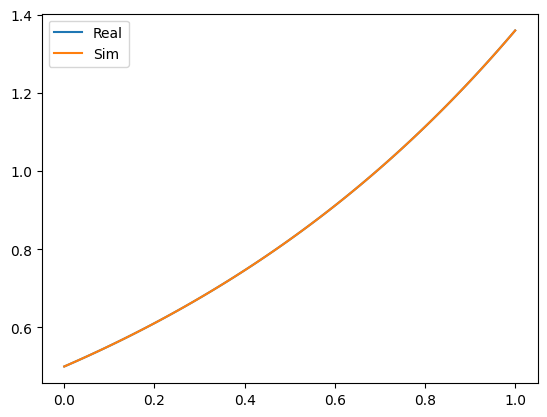

In [28]:
import numpy as np

# Example data (replace with your actual data)
x = np.linspace(0, 1, 50)  # 50 spatial points
t = np.linspace(0, 10, 100)  # 100 temporal points
dt = t[1] - t[0]

# Generate sample displacement data
X, T = np.meshgrid(x, t)
u = np.sin(np.pi * X) * np.cos(2 * np.pi * T)  # Example displacement data


# Flatten the data for PySINDy
u_flat = u.flatten()
x_flat = X.flatten()
t_flat = T.flatten()

# Create input data matrix
data = np.column_stack([x_flat, t_flat])


u = u.reshape(len(x), len(t), 1)


In [30]:
import pysindy as ps
library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: x, lambda x: x + x]

pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=3,
    spatial_grid=x,
    is_uniform=True,
)

print('STLSQ model: ')
optimizer = ps.STLSQ(threshold=2, alpha=1e-5, normalize_columns=True)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)

model.fit(u_flat, t=dt, x_dot = dx)
model.print()


STLSQ model: 


ValueError: Values in t should be in strictly increasing order.

In [22]:
# Initial conditions (replace with your actual initial conditions)
u0 = u[0]  # Initial displacement at t = 0

# Time array for simulation
t_sim = np.linspace(0, 10, 100)

# Simulate the system
u_sim = model.simulate(u0, t_sim)

# Reshape the simulated data to 2D grid
u_sim_2d = u_sim.reshape(len(t), len(x))

# Plot the original and simulated data for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.pcolormesh(X, T, u, shading='auto')
plt.title('Original Displacement Data')
plt.xlabel('x')
plt.ylabel('t')

# Simulated data
plt.subplot(1, 2, 2)
plt.pcolormesh(X, T, u_sim_2d, shading='auto')
plt.title('Simulated Displacement Data')
plt.xlabel('x')
plt.ylabel('t')

plt.tight_layout()
plt.show()


ValueError: `y0` must be 1-dimensional.